<a href="https://colab.research.google.com/github/Miragecore/MLOps_Coursera/blob/develop/C1/W1/Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

root_path = '/content/drive/MyDrive'
paths = ['MLOps_Coursera', 'ML_for_Production', 'Course1', 'Week1']

os.chdir(root_path)

for folder in paths:
  if not os.path.isdir(folder):
    os.mkdir(folder)
    print('mkdir {folder}')
  os.chdir(folder)

print(os.getcwd())
#서버가 먼저 실행되어 필요 폴더는 존재한다는 전제하에


서버 재실행때마다 base_url을 서버측의 임시 public URL로 변경 필요

In [4]:
base_url = 'http://1a22-35-196-39-141.ngrok.io'
endpoint = '/predict'
model = 'yolov3-tiny'

In [5]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'http://1a22-35-196-39-141.ngrok.io/predict'

In [6]:
full_url = url_with_endpoint_no_params + "?model=" + model
full_url

'http://1a22-35-196-39-141.ngrok.io/predict?model=yolov3-tiny'

In [7]:
def response_from_server(url, image_file, verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        image_file (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """
    
    files = {'file': image_file}
    
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

In [ ]:
#display(Image(filename=f"images/clock2.jpg"))
with open("images/clock2.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

In [13]:
dir_name = "images_predicted"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [14]:
def display_image_from_response(response):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """  
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    display(Image(f'images_predicted/{filename}'))

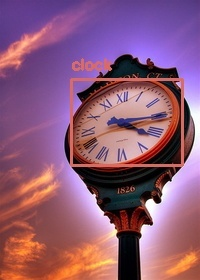

In [15]:
display_image_from_response(prediction)